# Manuscript Figure Generation

In [1]:
import math
from pathlib import Path

import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import plotnine as p9
import plydata as ply

# Generative Model Figures

In [2]:
color_names = {
    "turquoise": np.array([27, 158, 119, 255]) / 255,
    "orange": np.array([217, 95, 2, 255]) / 255,
    "purple": np.array([117, 112, 179, 255]) / 255,
    "pink": np.array([231, 41, 138, 255]) / 255,
    "light-green": np.array([102, 166, 30, 255]) / 255,
}

In [3]:
color_map = {
    "DaG": mcolors.to_hex(color_names["turquoise"]),
    "CtD": mcolors.to_hex(color_names["orange"]),
    "CbG": mcolors.to_hex(color_names["purple"]),
    "GiG": mcolors.to_hex(color_names["pink"]),
    "ALL": mcolors.to_hex(color_names["light-green"]),
}

## Figure 2 Generative Model - AUROC

In [4]:
gen_model_performance_df = pd.read_csv(
    Path("../generative_model_training/output/generative_model_performance.tsv"),
    sep="\t",
)
gen_model_performance_df.lf_num = pd.Categorical(
    gen_model_performance_df.lf_num.tolist(),
    categories=["0", "1", "6", "11", "16", "All"],
)
gen_model_performance_df >> ply.slice_rows(10)

,lf_num,auroc,aupr,bce_loss,label_source,data_source,model,prediction_label,aupr_mean,aupr_upper_ci,aupr_lower_ci,auroc_mean,auroc_upper_ci,auroc_lower_ci,bce_mean,bce_upper_ci,bce_lower_ci
0,1,0.673485,0.189110,1.112709,DaG,abstract,tune,GiG,0.209217,0.215424,0.203010,0.675178,0.678579,0.671776,1.863560,2.496436,1.230683
1,1,0.664303,0.305925,0.926120,DaG,abstract,test,GiG,0.296460,0.299414,0.293506,0.662261,0.664039,0.660484,1.407624,1.810895,1.004353
2,1,0.673902,0.237828,1.123652,DaG,abstract,tune,GiG,0.209217,0.215424,0.203010,0.675178,0.678579,0.671776,1.863560,2.496436,1.230683
3,1,0.660874,0.287429,0.940100,DaG,abstract,test,GiG,0.296460,0.299414,0.293506,0.662261,0.664039,0.660484,1.407624,1.810895,1.004353
4,1,0.702462,0.256449,1.134735,DaG,abstract,tune,GiG,0.209217,0.215424,0.203010,0.675178,0.678579,0.671776,1.863560,2.496436,1.230683
5,1,0.663186,0.304723,0.957108,DaG,abstract,test,GiG,0.296460,0.299414,0.293506,0.662261,0.664039,0.660484,1.407624,1.810895,1.004353
6,1,0.672538,0.188444,1.113852,DaG,abstract,tune,GiG,0.209217,0.215424,0.203010,0.675178,0.678579,0.671776,1.863560,2.496436,1.230683
7,1,0.662007,0.304228,0.927872,DaG,abstract,test,GiG,0.296460,0.299414,0.293506,0.662261,0.664039,0.660484,1.407624,1.810895,1.004353
8,1,0.688087,0.217658,1.409813,DaG,abstract,tune,GiG,0.209217,0.215424,0.203010,0.675178,0.678579,0.671776,1.863560,2.496436,1.230683
9,1,0.659136,0.293965,1.112122,DaG,abstract,test,GiG,0.296460,0.299414,0.293506,0.662261,0.664039,0.660484,1.407624,1.810895,1.004353


/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_two.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 16 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_two.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 16 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python

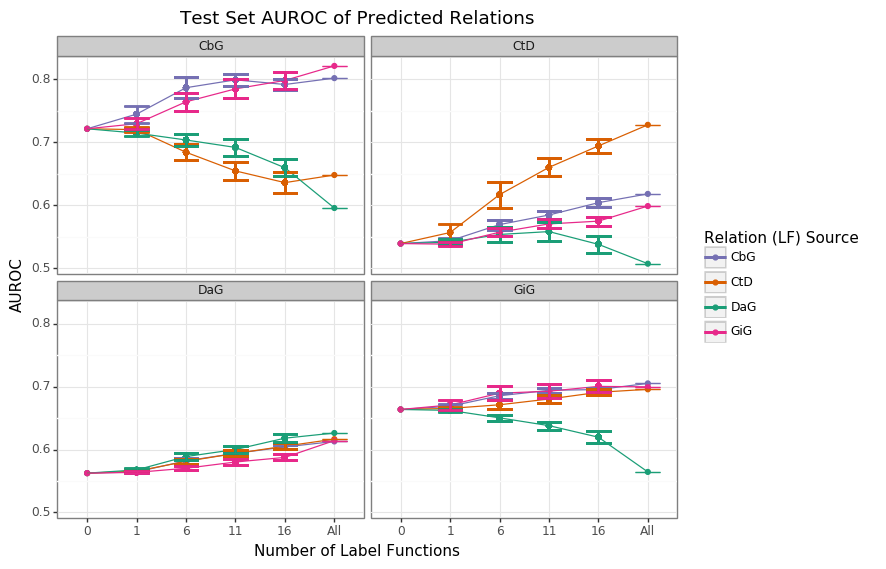

<ggplot: (-9223363270087002536)>


In [5]:
g = (
    p9.ggplot(
        gen_model_performance_df
        >> ply.query("data_source=='abstract'")
        >> ply.query("model=='test'")
    )
    + p9.aes(
        x="lf_num",
        y="auroc_mean",
        ymin="auroc_lower_ci",
        ymax="auroc_upper_ci",
        group="label_source",
        color="label_source",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.theme(figure_size=(8, 6))
    + p9.scale_color_manual(values=color_map)
    + p9.labs(
        title="Test Set AUROC of Predicted Relations", color="Relation (LF) Source"
    )
    + p9.xlab("Number of Label Functions")
    + p9.ylab("AUROC")
)
g.save("output/figure_two.svg")
g.save("output/figure_two.png", dpi=300)
print(g)

## Figure 3 - Generative Model AUPR

/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_three.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 16 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_three.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 16 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/py

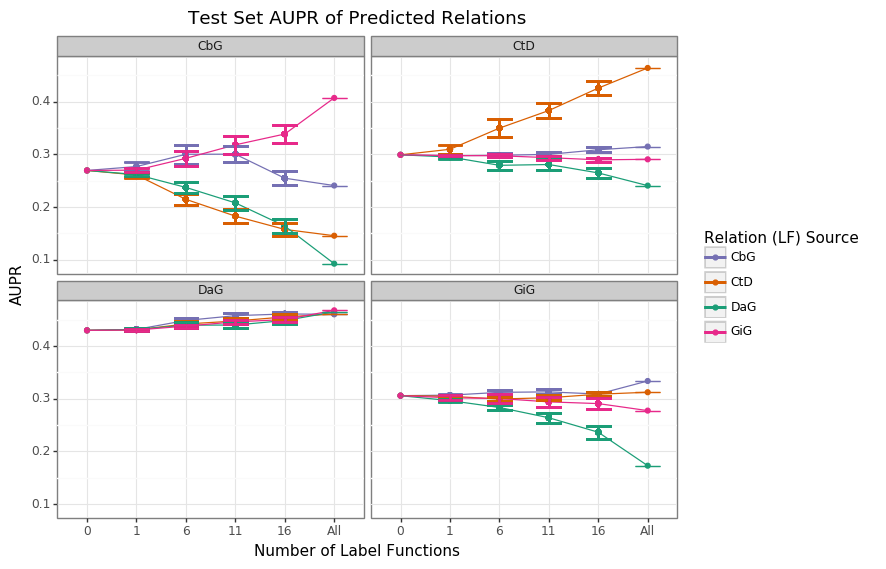

<ggplot: (8766763223595)>


In [6]:
g = (
    p9.ggplot(
        gen_model_performance_df
        >> ply.query("data_source=='abstract'")
        >> ply.query("model=='test'")
    )
    + p9.aes(
        x="lf_num",
        y="aupr_mean",
        ymin="aupr_lower_ci",
        ymax="aupr_upper_ci",
        group="label_source",
        color="label_source",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.theme(figure_size=(8, 6))
    + p9.scale_color_manual(values=color_map)
    + p9.labs(
        title="Test Set AUPR of Predicted Relations", color="Relation (LF) Source"
    )
    + p9.xlab("Number of Label Functions")
    + p9.ylab("AUPR")
)
g.save("output/figure_three.svg")
g.save("output/figure_three.png", dpi=300)
print(g)

## Figure 4 - Generative Model All Label Functions

In [7]:
gen_model_performance_all_df = pd.read_csv(
    Path(
        "../generative_model_training_all_labels/output/generative_model_all_lf_performance.tsv"
    ),
    sep="\t",
)
gen_model_performance_all_df >> ply.slice_rows(10)

,lf_num,label_source,prediction_label,data_source,model,aupr_mean,aupr_upper_ci,aupr_lower_ci,auroc_mean,auroc_upper_ci,auroc_lower_ci,bce_mean,bce_upper_ci,bce_lower_ci
0,1,ALL,GiG,abstract,tune,0.203718,0.209861,0.197575,0.673699,0.677176,0.670221,2.024274,2.717180,1.331369
1,1,ALL,GiG,abstract,test,0.299752,0.303289,0.296215,0.661429,0.664744,0.658114,1.518805,1.960492,1.077118
2,33,ALL,GiG,abstract,tune,0.238406,0.252841,0.223971,0.705633,0.720845,0.690422,2.161190,3.165923,1.156458
3,33,ALL,GiG,abstract,test,0.254714,0.265318,0.244110,0.668499,0.681552,0.655445,2.421302,3.332552,1.510052
4,65,ALL,GiG,abstract,tune,0.207883,0.217622,0.198144,0.696941,0.708812,0.685070,1.673600,1.878800,1.468400
5,65,ALL,GiG,abstract,test,0.226827,0.234388,0.219267,0.644986,0.655087,0.634885,2.350597,2.642073,2.059122
6,97,ALL,GiG,abstract,tune,0.189919,0.191195,0.188643,0.686947,0.688782,0.685111,2.343603,2.390361,2.296844
7,97,ALL,GiG,abstract,test,0.209034,0.210168,0.207899,0.630345,0.632055,0.628636,3.489914,3.567844,3.411984
8,99,ALL,GiG,abstract,tune,0.188283,0.188283,0.188283,0.684830,0.684830,0.684830,2.412497,2.412497,2.412497
9,99,ALL,GiG,abstract,test,0.207790,0.207790,0.207790,0.629143,0.629143,0.629143,3.524590,3.524590,3.524590


In [8]:
beginning_point_df = (
    gen_model_performance_df
    >> ply.query("lf_num=='0'")
    >> ply.query("data_source=='abstract'")
    >> ply.query("label_source==prediction_label")
    >> ply.define(label_source='"ALL"')
)
beginning_point_df

,lf_num,auroc,aupr,bce_loss,label_source,data_source,model,prediction_label,aupr_mean,aupr_upper_ci,aupr_lower_ci,auroc_mean,auroc_upper_ci,auroc_lower_ci,bce_mean,bce_upper_ci,bce_lower_ci
9636,0,0.673485,0.189110,1.112871,ALL,abstract,tune,GiG,0.189110,NaN,NaN,0.673485,NaN,NaN,1.112871,NaN,NaN
9640,0,0.663729,0.305850,0.926406,ALL,abstract,test,GiG,0.305850,NaN,NaN,0.663729,NaN,NaN,0.926406,NaN,NaN
9643,0,0.566458,0.162808,0.368750,ALL,abstract,tune,CbG,0.162808,NaN,NaN,0.566458,NaN,NaN,0.368750,NaN,NaN
9647,0,0.721370,0.269354,0.356180,ALL,abstract,test,CbG,0.269354,NaN,NaN,0.721370,NaN,NaN,0.356180,NaN,NaN
9657,0,0.490327,0.398988,2.389194,ALL,abstract,tune,DaG,0.398988,NaN,NaN,0.490327,NaN,NaN,2.389194,NaN,NaN
9661,0,0.562500,0.429893,1.824956,ALL,abstract,test,DaG,0.429893,NaN,NaN,0.562500,NaN,NaN,1.824956,NaN,NaN
9674,0,0.674569,0.475489,0.544531,ALL,abstract,tune,CtD,0.475489,NaN,NaN,0.674569,NaN,NaN,0.544531,NaN,NaN
9678,0,0.538901,0.299052,0.563438,ALL,abstract,test,CtD,0.299052,NaN,NaN,0.538901,NaN,NaN,0.563438,NaN,NaN


In [9]:
gen_model_performance_all_df = (
    gen_model_performance_all_df
    >> ply.call(".append", gen_model_performance_df)
    >> ply.query("data_source=='abstract'")
    >> ply.call(".append", beginning_point_df)
    >> ply.define(lf_num=ply.expressions.if_else("lf_num=='All'", 99, "lf_num"))
    >> ply.define(lf_num="lf_num.astype(int)")
    >> ply.define(
        lf_num=ply.expressions.case_when(
            {
                "lf_num==1": "lf_num",
                "lf_num==6": 33,
                "lf_num==11": 65,
                "lf_num==16": 97,
                True: "lf_num",
            }
        )
    )
)
gen_model_performance_all_df.lf_num = pd.Categorical(
    gen_model_performance_all_df.lf_num.tolist(), categories=[0, 1, 33, 65, 97, 99]
)
gen_model_performance_all_df >> ply.slice_rows(10)

,lf_num,label_source,prediction_label,data_source,model,aupr_mean,aupr_upper_ci,aupr_lower_ci,auroc_mean,auroc_upper_ci,auroc_lower_ci,bce_mean,bce_upper_ci,bce_lower_ci,auroc,aupr,bce_loss
0,1,ALL,GiG,abstract,tune,0.203718,0.209861,0.197575,0.673699,0.677176,0.670221,2.024274,2.717180,1.331369,NaN,NaN,NaN
1,1,ALL,GiG,abstract,test,0.299752,0.303289,0.296215,0.661429,0.664744,0.658114,1.518805,1.960492,1.077118,NaN,NaN,NaN
2,33,ALL,GiG,abstract,tune,0.238406,0.252841,0.223971,0.705633,0.720845,0.690422,2.161190,3.165923,1.156458,NaN,NaN,NaN
3,33,ALL,GiG,abstract,test,0.254714,0.265318,0.244110,0.668499,0.681552,0.655445,2.421302,3.332552,1.510052,NaN,NaN,NaN
4,65,ALL,GiG,abstract,tune,0.207883,0.217622,0.198144,0.696941,0.708812,0.685070,1.673600,1.878800,1.468400,NaN,NaN,NaN
5,65,ALL,GiG,abstract,test,0.226827,0.234388,0.219267,0.644986,0.655087,0.634885,2.350597,2.642073,2.059122,NaN,NaN,NaN
6,97,ALL,GiG,abstract,tune,0.189919,0.191195,0.188643,0.686947,0.688782,0.685111,2.343603,2.390361,2.296844,NaN,NaN,NaN
7,97,ALL,GiG,abstract,test,0.209034,0.210168,0.207899,0.630345,0.632055,0.628636,3.489914,3.567844,3.411984,NaN,NaN,NaN
8,99,ALL,GiG,abstract,tune,0.188283,0.188283,0.188283,0.684830,0.684830,0.684830,2.412497,2.412497,2.412497,NaN,NaN,NaN
9,99,ALL,GiG,abstract,test,0.207790,0.207790,0.207790,0.629143,0.629143,0.629143,3.524590,3.524590,3.524590,NaN,NaN,NaN


/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_four.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 8 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_four.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 8 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python

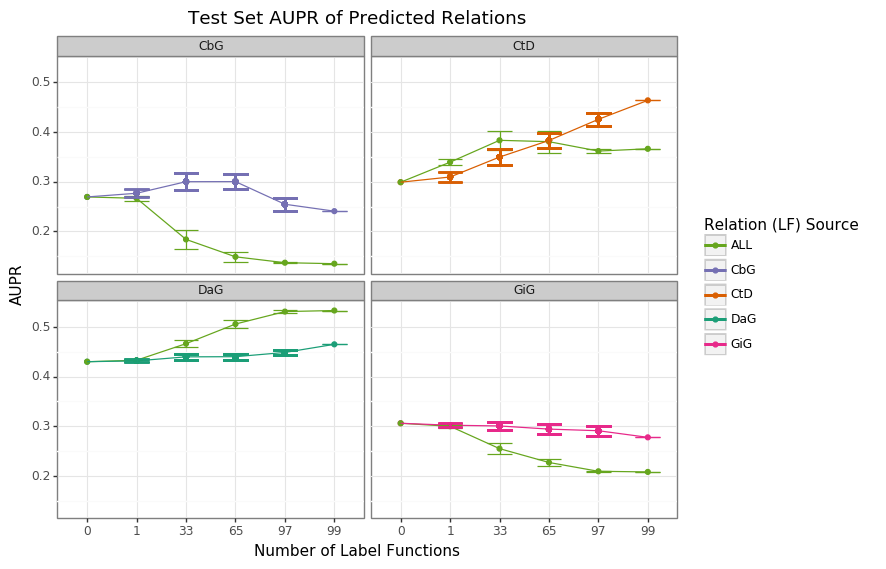

<ggplot: (8766762831294)>


In [10]:
g = (
    p9.ggplot(
        gen_model_performance_all_df
        >> ply.query("label_source==prediction_label|label_source=='ALL'")
        >> ply.query("model=='test'")
    )
    + p9.aes(
        x="lf_num",
        y="aupr_mean",
        ymin="aupr_lower_ci",
        ymax="aupr_upper_ci",
        group="label_source",
        color="label_source",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.theme(figure_size=(8, 6))
    + p9.scale_color_manual(values=color_map)
    + p9.labs(
        title="Test Set AUPR of Predicted Relations", color="Relation (LF) Source"
    )
    + p9.xlab("Number of Label Functions")
    + p9.ylab("AUPR")
)
g.save("output/figure_four.svg")
g.save("output/figure_four.png", dpi=300)
print(g)

/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_five.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 8 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_five.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 8 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python

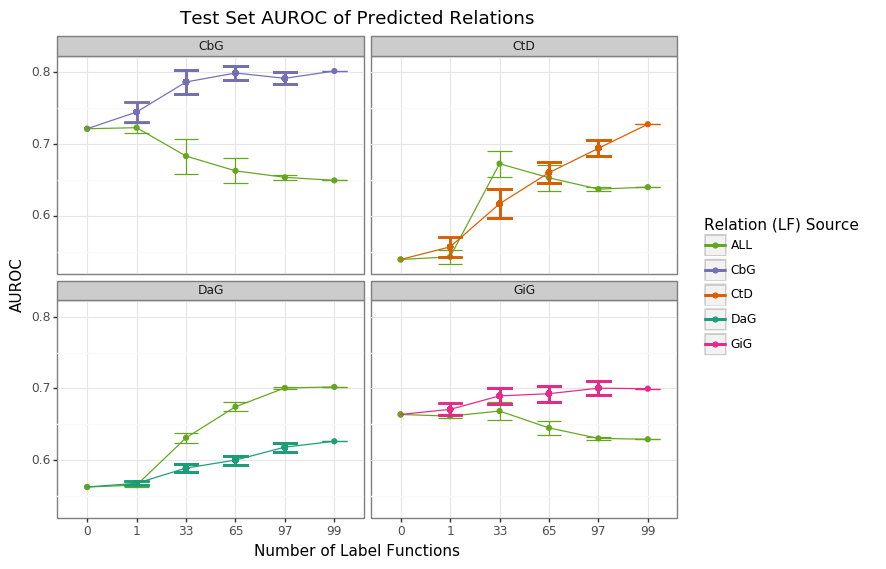

<ggplot: (-9223363270091714374)>


In [11]:
g = (
    p9.ggplot(
        gen_model_performance_all_df
        >> ply.query("label_source==prediction_label|label_source=='ALL'")
        >> ply.query("model=='test'")
    )
    + p9.aes(
        x="lf_num",
        y="auroc_mean",
        ymin="auroc_lower_ci",
        ymax="auroc_upper_ci",
        group="label_source",
        color="label_source",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.theme(figure_size=(8, 6))
    + p9.scale_color_manual(values=color_map)
    + p9.labs(
        title="Test Set AUROC of Predicted Relations", color="Relation (LF) Source"
    )
    + p9.xlab("Number of Label Functions")
    + p9.ylab("AUROC")
)
g.save("output/figure_five.svg")
g.save("output/figure_five.png", dpi=300)
print(g)

# Discriminator Model Figures

## Figure 5 - Discriminator Model vs Generative Model

In [12]:
disc_performance_df = pd.read_csv(
    Path("../discriminative_model_training/output/all_total_lf_performance.tsv"),
    sep="\t",
)
disc_performance_df.lf_num = pd.Categorical(
    disc_performance_df.lf_num.tolist(), categories=["0", "1", "6", "11", "16", "All"]
)
disc_performance_df

,lf_num,auroc,aupr,label_source,dataset,epochs,l2_param,lr_param,prediction_label,model,aupr_mean,aupr_upper_ci,aupr_lower_ci,auroc_mean,auroc_upper_ci,auroc_lower_ci
0,0,0.673485,0.189110,GiG,tune,250.0,1.2575,0.001,GiG,Gen,0.189110,NaN,NaN,0.673485,NaN,NaN
1,0,0.458992,0.337271,DaG,tune,NaN,NaN,NaN,DaG,Disc,0.333316,0.343604,0.323028,0.463395,0.470051,0.456740
2,0,0.460448,0.338626,DaG,tune,NaN,NaN,NaN,DaG,Disc,0.333316,0.343604,0.323028,0.463395,0.470051,0.456740
3,0,0.467785,0.346633,DaG,tune,NaN,NaN,NaN,DaG,Disc,0.333316,0.343604,0.323028,0.463395,0.470051,0.456740
4,0,0.468826,0.344484,DaG,tune,NaN,NaN,NaN,DaG,Disc,0.333316,0.343604,0.323028,0.463395,0.470051,0.456740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,All,0.757353,0.380921,GiG,tune,NaN,NaN,NaN,GiG,Disc,0.362015,0.386900,0.337129,0.768078,0.779224,0.756931
9291,All,0.737129,0.359600,GiG,tune,NaN,NaN,NaN,GiG,Disc,0.362015,0.386900,0.337129,0.768078,0.779224,0.756931
9292,All,0.747175,0.397602,GiG,tune,NaN,NaN,NaN,GiG,Disc,0.362015,0.386900,0.337129,0.768078,0.779224,0.756931
9293,All,0.745059,0.270966,GiG,tune,NaN,NaN,NaN,GiG,Disc,0.362015,0.386900,0.337129,0.768078,0.779224,0.756931


/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_six.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_six.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.

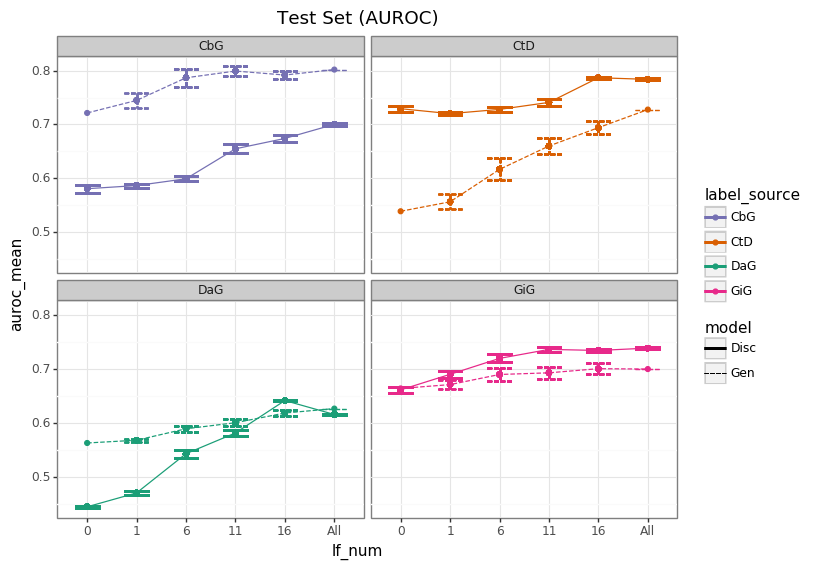

<ggplot: (-9223363270089522197)>


In [13]:
g = (
    p9.ggplot(disc_performance_df >> ply.query("dataset=='test'"))
    + p9.aes(
        x="lf_num",
        y="auroc_mean",
        ymin="auroc_lower_ci",
        ymax="auroc_upper_ci",
        group="model",
        color="label_source",
        linetype="model",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.scale_color_manual(values=color_map)
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.labs(title="Test Set (AUROC)")
    + p9.theme(figure_size=(8, 6))
)
g.save("output/figure_six.svg")
g.save("output/figure_six.png", dpi=300)
print(g)

/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_seven.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_seven.png
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/pyth

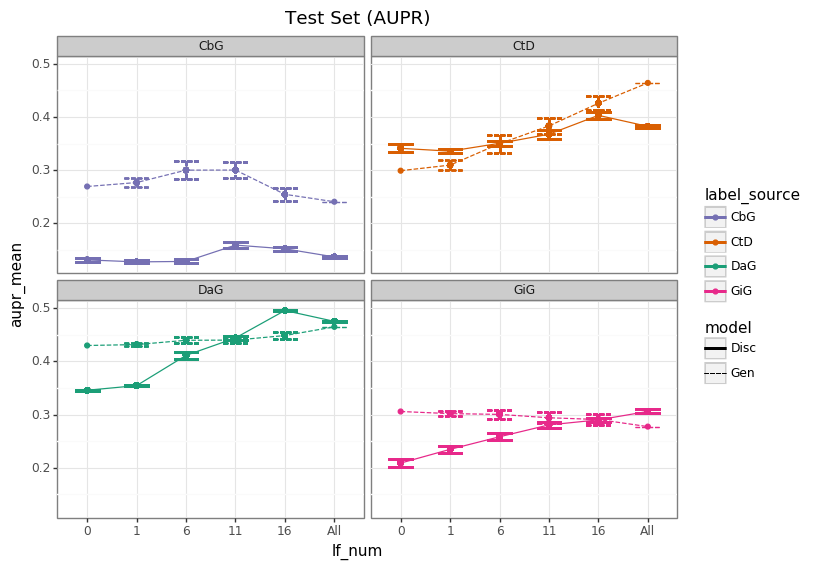

<ggplot: (8766762424815)>


In [14]:
g = (
    p9.ggplot(disc_performance_df >> ply.query("dataset=='test'"))
    + p9.aes(
        x="lf_num",
        y="aupr_mean",
        ymin="aupr_lower_ci",
        ymax="aupr_upper_ci",
        group="model",
        color="label_source",
        linetype="model",
    )
    + p9.geom_point()
    + p9.geom_line()
    + p9.geom_errorbar()
    + p9.scale_color_manual(values=color_map)
    + p9.facet_wrap("~ prediction_label")
    + p9.theme_bw()
    + p9.labs(title="Test Set (AUPR)")
    + p9.theme(figure_size=(8, 6))
)
g.save("output/figure_seven.svg")
g.save("output/figure_seven.png", dpi=300)
print(g)

# Edge Prediction

In [15]:
edge_recall_df = (
    pd.concat(
        [
            pd.read_csv(recall_file_path, sep="\t", index_col=0)
            for recall_file_path in Path("../edge_prediction_experiment/output/").rglob(
                "*edge_recall.tsv"
            )
        ]
    )
    >> ply.call(".reset_index")
    >> ply.select("-index")
)
edge_recall_df

,recall,edges,in_hetionet,relation
0,0.331669,8172,Existing,DaG
1,NaN,101518,Novel,DaG
2,0.329052,4227,Existing,CbG
3,NaN,128025,Novel,CbG
4,0.318011,1017,Existing,CtD
5,NaN,11146,Novel,CtD
6,0.285969,18131,Existing,GiG
7,NaN,277542,Novel,GiG


/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_eight.svg
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 6 in image.
/home/danich1/anaconda3/envs/snorkeling_full_text/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figure_eight.png


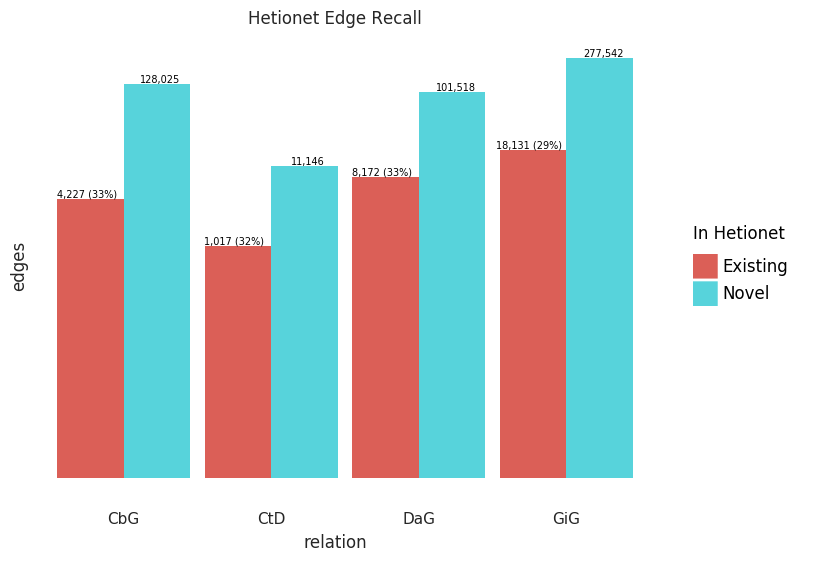

<ggplot: (8766762475868)>


In [17]:
g = (
    p9.ggplot(edge_recall_df, p9.aes(x="relation", y="edges", fill="in_hetionet"))
    + p9.geom_col(position="dodge")
    + p9.geom_text(
        p9.aes(
            label=(
                edge_recall_df.apply(
                    lambda x: f"{x['edges']:,} ({x['recall']:.0%})"
                    if not math.isnan(x["recall"])
                    else f"{x['edges']:,}",
                    axis=1,
                )
            )
        ),
        position=p9.position_dodge(width=1),
        size=7,
        va="bottom",
    )
    + p9.scale_y_log10()
    + p9.theme_seaborn("white")
    + p9.theme(
        axis_text_y=p9.element_blank(),
        axis_ticks_major=p9.element_blank(),
        axis_ticks_minor=p9.element_blank(),
        rect=p9.element_blank(),
        axis_line=p9.element_blank(),
        figure_size=(8, 6),
    )
    + p9.labs(title="Hetionet Edge Recall", fill="In Hetionet")
)
g.save("output/figure_eight.svg")
g.save("output/figure_eight.png", dpi=300)
print(g)